In [1]:
### conflits with Deepnote ###

# matplotlib inline plotting
%matplotlib inline
# make inline plotting higher resolution
%config InlineBackend.figure_format = 'svg'

### conflits with Deepnote ###

In [2]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('dark_background')

# Assignment


Apply the VAR approach to test the Expectations Hypothesis on the US bond market. The data contains annual observations from 1954 to 2019 on the yield spread between 10-year Treasury notes and 1-year Treasury bills, as well as the Örst di§erence of the latter. All variables are measured in logs. This problem set is a natural extension of the analysis performed on the US stock market in the Matlab program already available on Blackboard. You can solve the problem set by making prober adjustments of the already provided program.

__Variables:__

- _spr_: Yield spread $$s_{t}^{(10)}=\left(y_t^{(10)}-y_t^{(1)}\right)$$
- _dy1_: First difference of the short yield $$\Delta y_{t}^{(1)}=\left(y_t^{(1)}-y_{t-1}^{(1)}\right)$$

## Problem 1
Estimate the VAR(1) model
$$
\left[\begin{array}{c}
s_{t+1}^{(10)} \\
\Delta y_{t+1}^{(1)}
\end{array}\right]=\left[\begin{array}{ll}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{array}\right]\left[\begin{array}{c}
s_{t}^{(10)} \\
\Delta y_{t}^{(1)}
\end{array}\right]+\left[\begin{array}{c}
\varepsilon_{1, t+1} \\
\varepsilon_{2, t+1}
\end{array}\right]
$$
where $s_{t}^{(10)}=y_{t}^{(10)}-y_{t}^{(1)}$ and $\Delta y_{t}^{(1)}=y_{t}^{(1)}-y_{t-1}^{(1)}$

In [3]:
df = pd.read_excel('Data.xlsx', engine='openpyxl')

df = df.rename(columns={df.columns[0]: 'date'})
df['date'] = pd.to_datetime(df['date'], format=('%Y'))

df.head()

,date,spr,dy1
0,1954-01-01,0.012763,-0.004436
1,1955-01-01,0.002236,0.014907
2,1956-01-01,-0.000868,0.009205
3,1957-01-01,0.000291,-0.004834
4,1958-01-01,0.005503,0.001066


In [4]:
# shift timeseries to fit 1955-2019
df = df.iloc[:-1]
df.tail()

,date,spr,dy1
60,2014-01-01,0.019762,0.000799
61,2015-01-01,0.015674,0.004381
62,2016-01-01,0.015933,0.002183
63,2017-01-01,0.006859,0.008195
64,2018-01-01,0.001655,0.009395


### Plotting the time-series

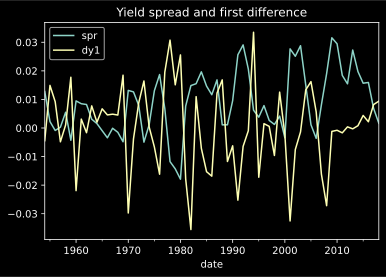

In [5]:
df.set_index('date').plot()
plt.title('Yield spread and first difference')
plt.show()

### De-mean

We not that the way the requested model is written, we abstract from the constant term. This requires us to first de-mean the variables in question

In [6]:
df['spr'] = df['spr'] - df['spr'].mean()
df['dy1'] = df['dy1'] - df['dy1'].mean()

### Fitting the VAR model as specified in the assignment

In [7]:
res = sm.tsa.var.var_model.VAR(endog=df[['spr', 'dy1']]).fit()

res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 19, Jan, 2021
Time:                     10:21:56
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -18.6418
Nobs:                     64.0000    HQIC:                  -18.7644
Log likelihood:           427.389    FPE:                6.54859e-09
AIC:                     -18.8442    Det(Omega_mle):     5.97528e-09
--------------------------------------------------------------------
Results for equation spr
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.000150         0.001016           -0.148           0.882
L1.spr         0.456596         0.107169            4.261           0.000
L1.dy1        -0.261662         0.081716           -3.202           0.001

Results for equ

### Results

The fact that $\hat{\alpha}_{21}$ is not significantly different from zero implies that _not_ all time-variation in the yield spread comes from the short-term interest rate. We know the following relation from the present value relation in terms of bonds: $s_{t}^{(n)}=\frac{1}{n} \sum_{i=1}^{n-1} E_{t}\left[(n-i) \Delta y_{t+i}^{(1)}\right]+\underbrace{\frac{1}{n} \sum_{i=0}^{n-1} E_{t}\left(r_{t+1+i}^{(n-i)}-y_{t+i}^{(1)}\right)}_{R P}$. This equation states that changes in the yield spread is due to:
- Changing expectations about the short-term interest rate
- Changing expectations about future term (risk) premium 

We also know that all three versions of the expectations hypothesis expects term (risk) premium to be constant over time. However the results above seem to indicate, that there are at least some variation in term (risk) premium over time.

## Problem 2
Test the restrictions imposed on the present value model by the Expectations Hy-
pothesis
$$
e 1^{\prime}=e 2^{\prime} A\left[I-\frac{1}{10}\left(I-A^{10}\right)(I-A)^{-1}\right](I-A)^{-1}
$$
where $e 1^{\prime}=\left[\begin{array}{ll}1 & 0\end{array}\right], e 2^{\prime}=\left[\begin{array}{ll}0 & 1\end{array}\right], I=\left[\begin{array}{ll}1 & 0 \\ 0 & 1\end{array}\right],$ and $A=\left[\begin{array}{ll}a_{11} & a_{12} \\ a_{21} & a_{22}\end{array}\right]$

## Problem 3
Compute the theoretical yield spread as
$$
s_{t}^{(10)}=e 2^{\prime} A\left[I-\frac{1}{10}\left(I-A^{10}\right)(I-A)^{-1}\right](I-A)^{-1} Z_{t}
$$
where $Z_{t}=\left[\begin{array}{c}s_{t}^{(10)} \\ \Delta y_{t}^{(1)}\end{array}\right]$ and report $\operatorname{corr}\left(s_{t}^{(10)}, s_{t}^{(10)}\right)$ and $\operatorname{var}\left(s_{t}^{(10)}\right) / \operatorname{var}\left(s_{t}^{(10)}\right)$

Plot also the actual and theoretical yield spreads together in a figure.

In [8]:
# First re-estimate the VAR(2) model without a constant and to obtain the coeffcient matrix
res = sm.tsa.var.var_model.VAR(endog=df[['spr', 'dy1']]).fit(trend='nc')

In [9]:
# Get variables needed to calculate theoretical spread
A = res.params.to_numpy()
A = A.transpose()

Z = df[['spr', 'dy1']].to_numpy()
Z = Z.transpose()

I = np.identity(2)

e2 = np.matrix([0,1])

In [10]:
# Calculate theoretical yield
spr_z = e2*A*(I - (1/10)*np.matmul((I-A**10), np.linalg.inv(I-A)))*np.linalg.inv(I-A)*Z

In [11]:
# Calculate requested metrics

cor = np.corrcoef(df['spr'].to_numpy(), spr_z)[1,0]
var_ratio = np.var(df['spr'].to_numpy()) / np.var(spr_z)

print(f'Correlation between actual and theoretical yield spread is: {np.round(cor, 4)}')
print(f'Variance ratio between actual and theoretical yield spread is: {np.round(var_ratio, 4)}')

Correlation between actual and theoretical yield spread is: 0.9674
Variance ratio between actual and theoretical yield spread is: 5.6033


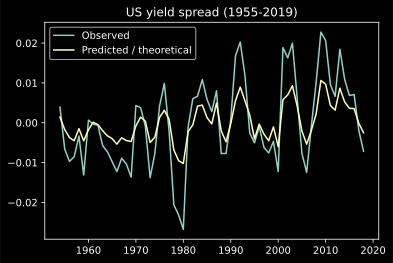

In [12]:
df = df.join(pd.DataFrame(spr_z.transpose())).set_index('date')
df = df.rename(columns={0: 'spr_z'})

plt.plot(df['spr'], label='Observed')
plt.plot(df['spr_z'], label='Predicted / theoretical')
plt.legend()

plt.title('US yield spread (1955-2019)')

plt.show()

### Results

We see that the actual yield spreads are somewhat more volatile than the theoretical spread. The correlation is although very close to 1, so there are similar movements - just not of similar relative volatility. This volatility is very visible in the variance ratio, which is very high at 5.6033.

This resuts provide some evidence that the Expectations Hypothesis does not hold.